# Linear matter power spectra from class-seos 
## Comparison between LCDM and SEoS model

Details for SEoS model can be found in  arXiv:1708.08529 

In [2]:
%pylab inline
from scipy import interpolate

Populating the interactive namespace from numpy and matplotlib


## Loading the files from class

In [3]:
seospath = './../output/seos/seos-'
lcdmpath = './../output/lcdm/lcdm-'

seos = 'seosbfv_z'
planck = 'pTTlP_z'

pk = '_pk.dat'

In [76]:
#### array name: pk_model_bfv_zvalue #####

#------------------ SEoS --------------------#

# SEOS - seos
pk_s_s_z0 = np.loadtxt(seospath+seos+'1'+pk)
pk_s_s_z028 = np.loadtxt(seospath+seos+'2'+pk)
pk_s_s_z056 = np.loadtxt(seospath+seos+'3'+pk)
pk_s_s_z1 = np.loadtxt(seospath+seos+'4'+pk)
pk_s_s_z99 = np.loadtxt(seospath+seos+'6'+pk)

#we used w_i = -0.99999 instead of -0.99 for this case, inforcing a Lambda soln at large z's
pk_s_s99_z0 = np.loadtxt(seospath+'seosbfv99_z'+'1'+pk)
pk_s_s99_z028 = np.loadtxt(seospath+'seosbfv99_z'+'2'+pk)
pk_s_s99_z056 = np.loadtxt(seospath+'seosbfv99_z'+'3'+pk)
pk_s_s99_z1 = np.loadtxt(seospath+'seosbfv99_z'+'4'+pk)
pk_s_s99_z99 = np.loadtxt(seospath+'seosbfv99_z'+'6'+pk)

# SEOS - planck 
pk_s_p_z0 = np.loadtxt(seospath+planck+'1'+pk)
pk_s_p_z028 = np.loadtxt(seospath+planck+'2'+pk)
pk_s_p_z056 = np.loadtxt(seospath+planck+'3'+pk)
pk_s_p_z1 = np.loadtxt(seospath+planck+'4'+pk)
pk_s_p_z99 = np.loadtxt(seospath+planck+'6'+pk)

#we used w_i = -0.99999 instead of -0.99 for this case, inforcing a Lambda soln at large z's
pk_s_p99_z0 = np.loadtxt(seospath+'pTTlP99_z'+'1'+pk)
pk_s_p99_z028 = np.loadtxt(seospath+'pTTlP99_z'+'2'+pk)
pk_s_p99_z056 = np.loadtxt(seospath+'pTTlP99_z'+'3'+pk)
pk_s_p99_z1 = np.loadtxt(seospath+'pTTlP99_z'+'4'+pk)
pk_s_p99_z99 = np.loadtxt(seospath+'pTTlP99_z'+'6'+pk)


### -----------------------------------------
# SEOS - planck 
pk_s_p_z0 = np.loadtxt(seospath+planck+'1'+pk)
pk_s_p_z0cs20 = np.loadtxt('./../output/seos/testcs2_0_pk.dat')
pk_s_p_z0cs2100 = np.loadtxt('./../output/seos/testcs2_100_pk.dat')


#------------------ LCDM --------------------#

# LCDM - seos
pk_l_s_z0 = np.loadtxt(lcdmpath+seos+'1'+pk)
pk_l_s_z028 = np.loadtxt(lcdmpath+seos+'2'+pk)
pk_l_s_z056 = np.loadtxt(lcdmpath+seos+'3'+pk)
pk_l_s_z1 = np.loadtxt(lcdmpath+seos+'4'+pk)
pk_l_s_z99 = np.loadtxt(lcdmpath+seos+'6'+pk)

# LCDM - planck 
pk_l_p_z0 = np.loadtxt(lcdmpath+planck+'1'+pk)
pk_l_p_z028 = np.loadtxt(lcdmpath+planck+'2'+pk)
pk_l_p_z056 = np.loadtxt(lcdmpath+planck+'3'+pk)
pk_l_p_z1 = np.loadtxt(lcdmpath+planck+'4'+pk)
pk_l_p_z99 = np.loadtxt(lcdmpath+planck+'6'+pk)

## Figures

In [43]:
class FancyFormatter(Formatter):
    '''Formatter for values with LaTeX fonts'''
    
    def __call__(self, v, pos=None):
        return r'${:.5G}$'.format(v)
    
    def format_data_short(self, value):
        return '{:.1f}'.format(value)


In [44]:
label_l = r'$\Lambda CDM$'
label_s = r'SEoS'
ls_l = '--'
ls_s = ':'
figspath = './../figs/'

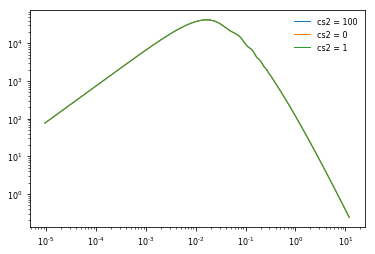

In [81]:
plot(pk_s_p_z0cs2100[:,0], pk_s_p_z0cs2100[:,1], label = 'cs2 = 100')
plot(pk_s_p_z0cs20[:,0], pk_s_p_z0cs20[:,1], label = 'cs2 = 0')
plot(pk_s_p_z0[:,0], pk_s_p_z0[:,1], label = 'cs2 = 1')
legend(loc='best', frameon=False)
xscale('log')
yscale('log')

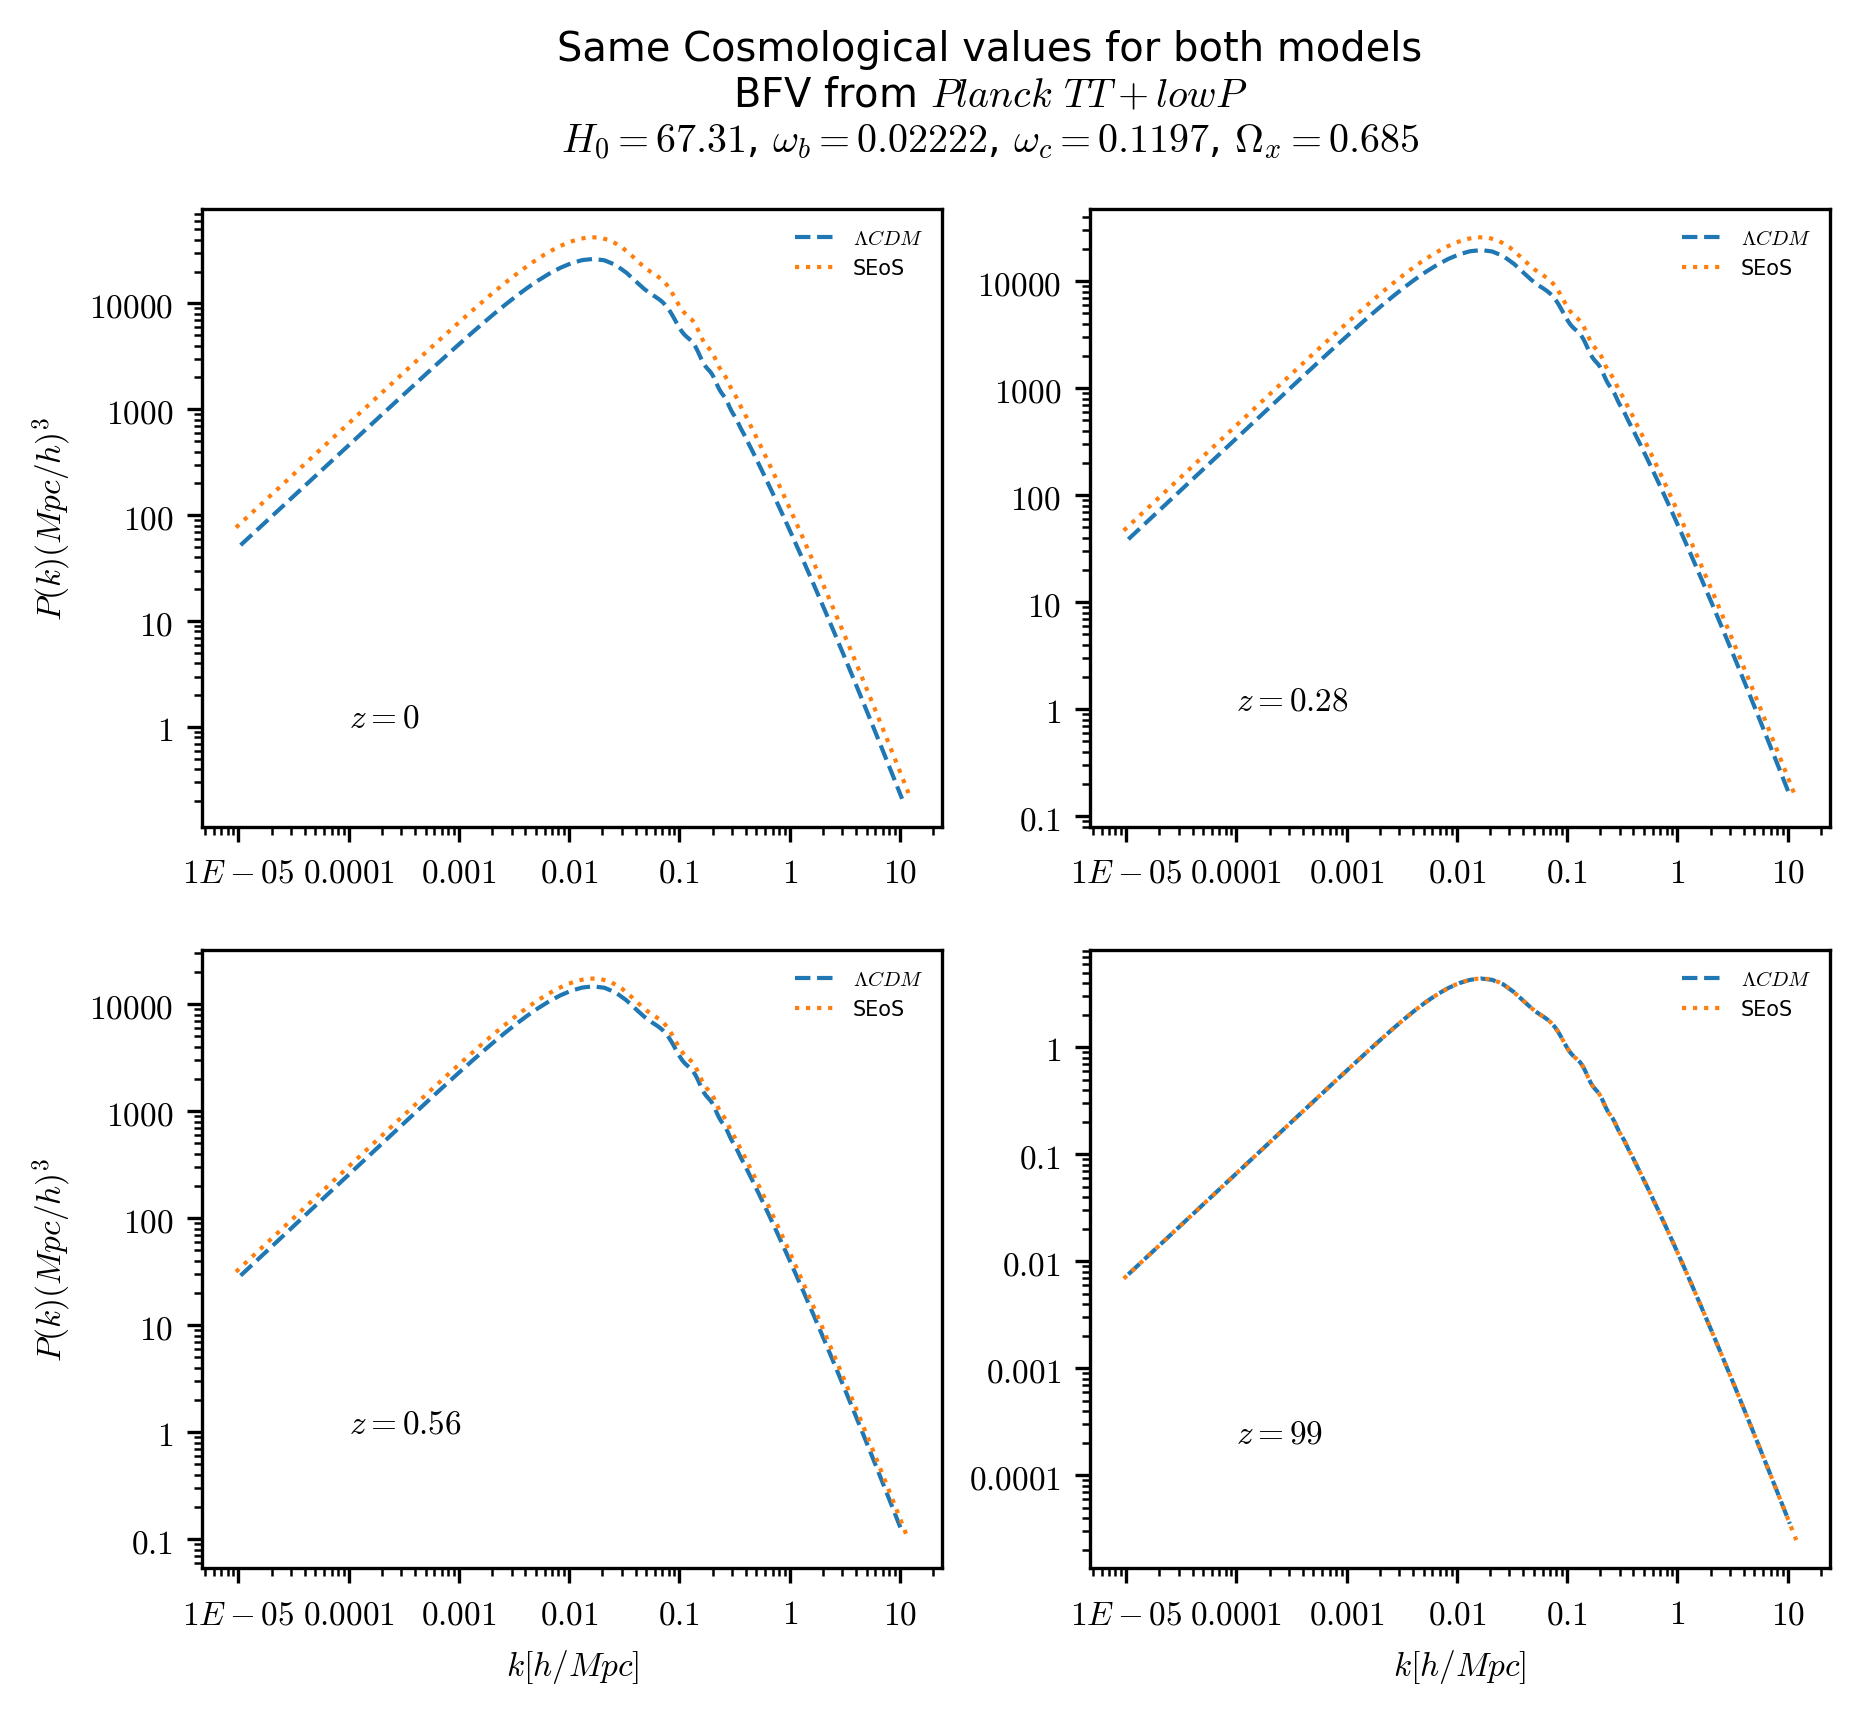

In [46]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'


fig.suptitle(r"Same Cosmological values for both models" 
           "\n"  # Newline
            "BFV from $Planck$ $TT+lowP$"
            "\n"  # Newline
           r"$H_0 = 67.31$, $\omega_b=0.02222$, $\omega_c=0.1197$, $\Omega_x=0.685$")

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.text(1e-4,1,r'$z=0$')
ax1.plot(pk_l_p_z0[:,0], pk_l_p_z0[:,1], label=label_l, ls=ls_l)
ax1.plot(pk_s_p_z0[:,0],pk_s_p_z0[:,1], label=label_s, ls = ls_s)
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.text(1e-4,1,r'$z=0.28$')
ax2.plot(pk_l_p_z028[:,0], pk_l_p_z028[:,1], label=label_l,ls=ls_l)
ax2.plot(pk_s_p_z028[:,0],pk_s_p_z028[:,1], label=label_s,ls=ls_s)
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.text(1e-4,1,r'$z=0.56$')
ax3.plot(pk_l_p_z056[:,0], pk_l_p_z056[:,1], label=label_l,ls=ls_l)
ax3.plot(pk_s_p_z056[:,0],pk_s_p_z056[:,1], label=label_s,ls=ls_s)
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.text(1e-4,2e-4,r'$z=99$')
ax4.plot(pk_l_p_z99[:,0], pk_l_p_z99[:,1], label=label_l,ls=ls_l)
ax4.plot(pk_s_p_z99[:,0],pk_s_p_z99[:,1], label=label_s,ls=ls_s)
ax4.legend(loc='best', frameon=False, prop={'size':5})
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_bfv-pTTlP.pdf', bbox_inches ='tight')º

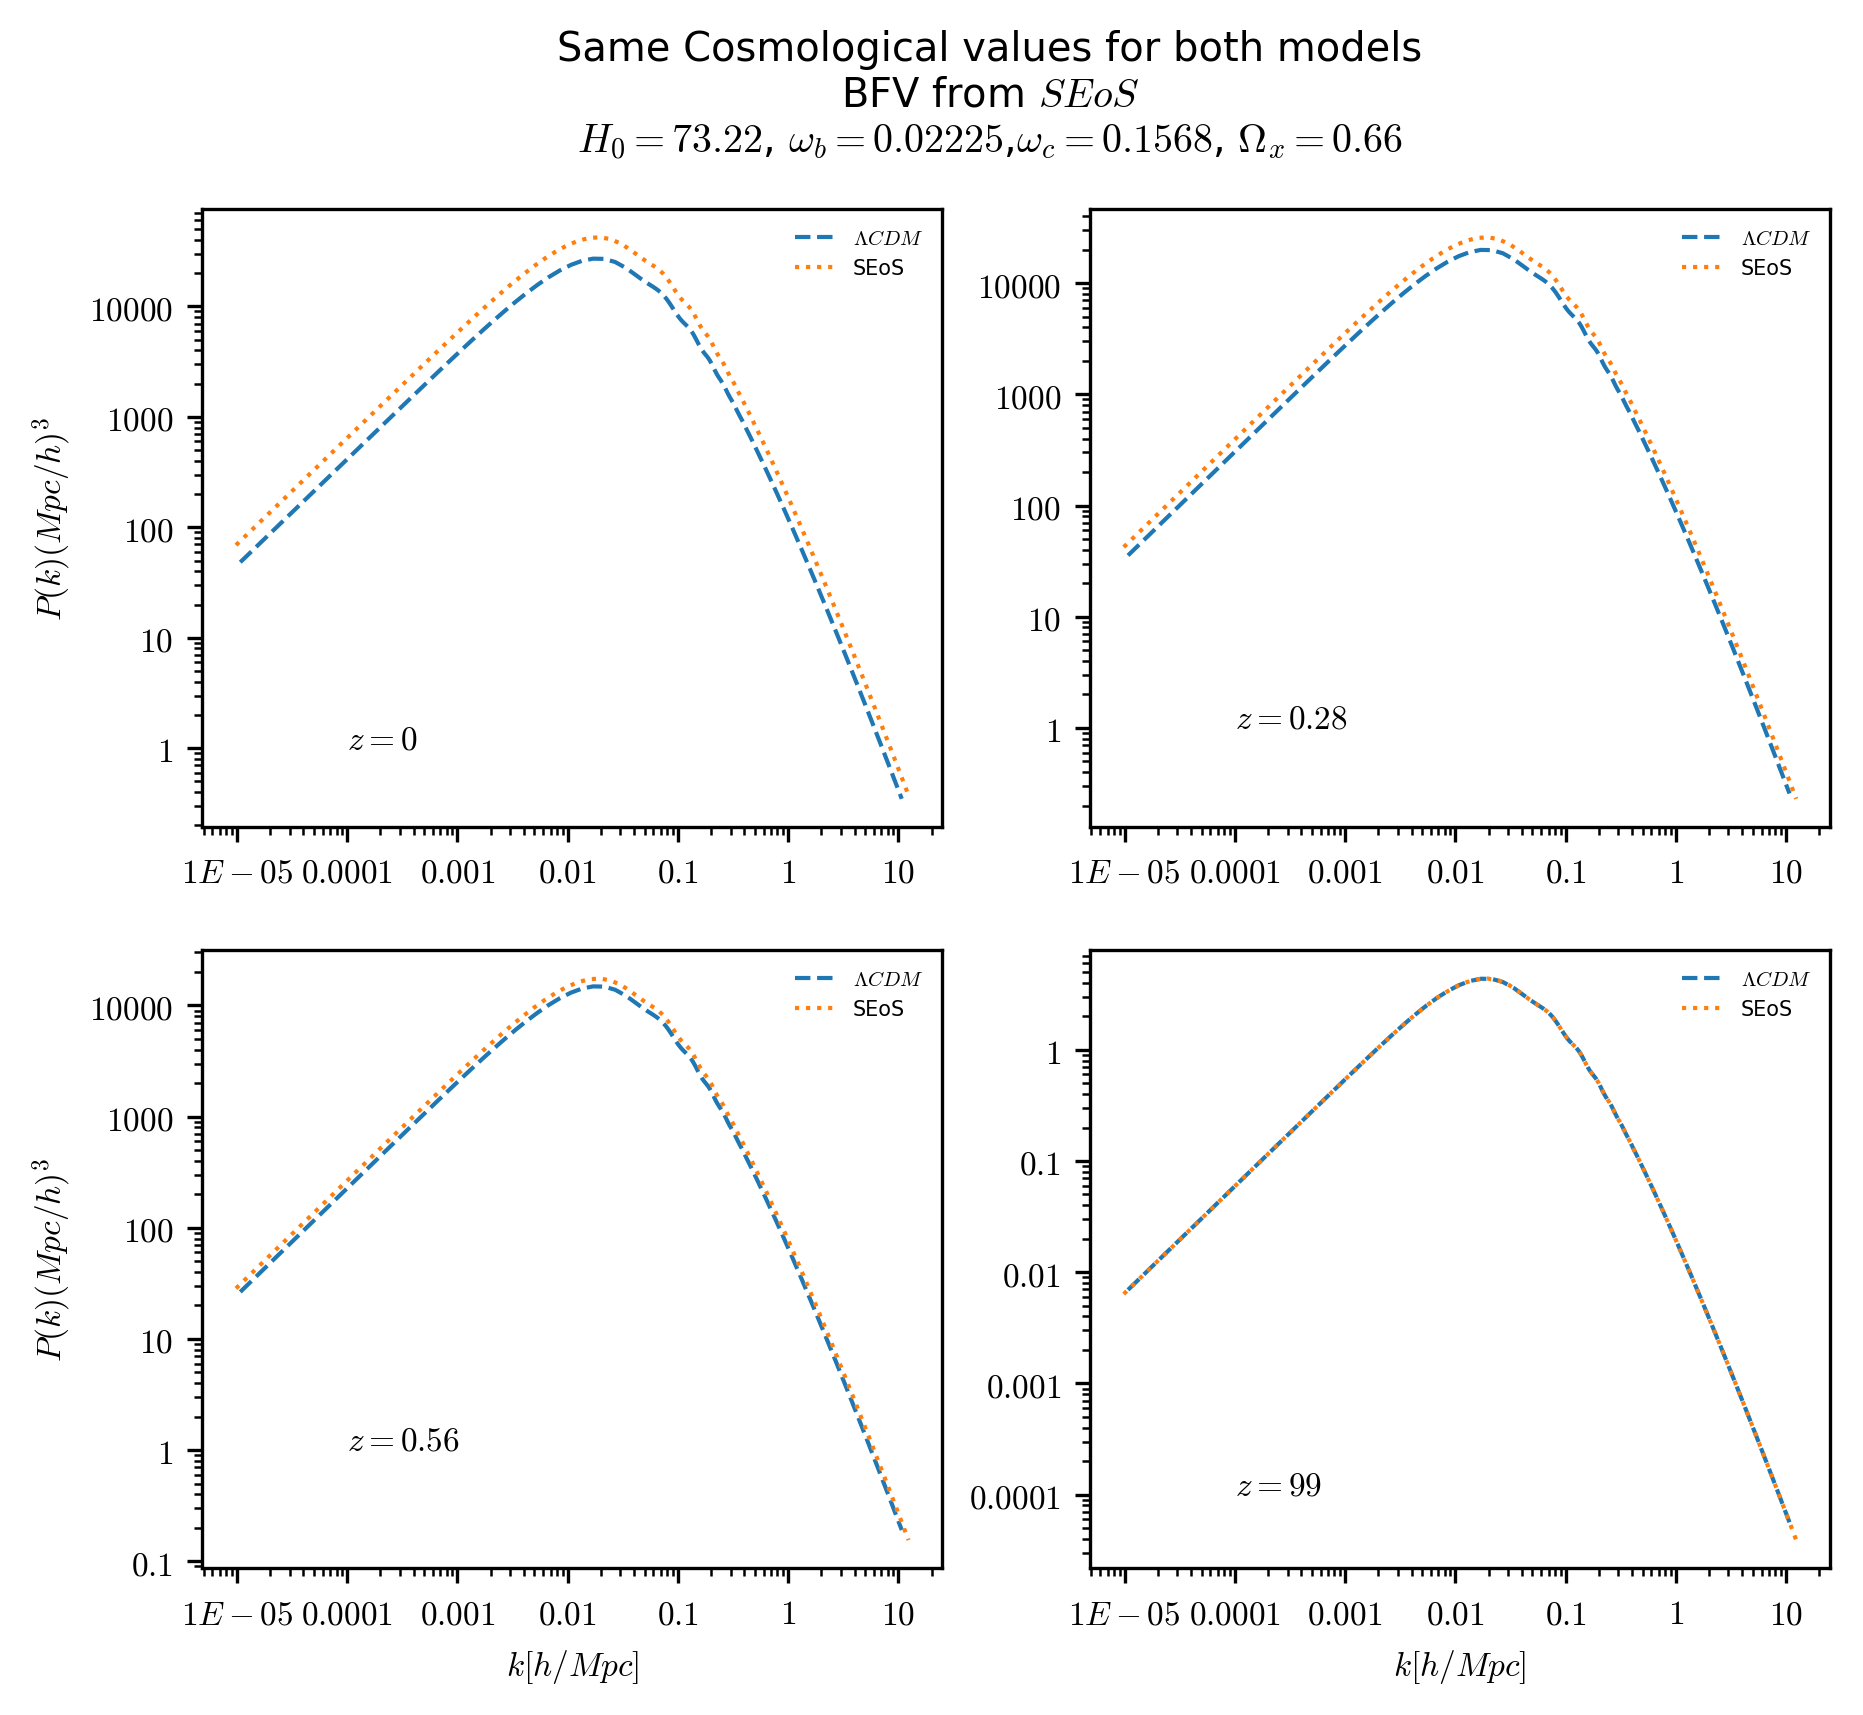

In [49]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

fig.suptitle(r"Same Cosmological values for both models" 
           "\n"  # Newline
            r'BFV from $SEoS$'           
           "\n"  # Newline
           r"$H_0 = 73.22$, $\omega_b=0.02225$,$\omega_c=0.1568$, $\Omega_x=0.66$")

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.text(1e-4,1,r'$z=0$')

ax1.plot(pk_l_s_z0[:,0], pk_l_s_z0[:,1], label=label_l,ls=ls_l)
ax1.plot(pk_s_s_z0[:,0], pk_s_s_z0[:,1], label=label_s,ls=ls_s)
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$P(k)(Mpc/h)^3$')
#ax1.set_xlabel(r'$k[h/Mpc]$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.text(1e-4,1,r'$z=0.28$')
ax2.plot(pk_l_s_z028[:,0], pk_l_s_z028[:,1], label=label_l,ls=ls_l)
ax2.plot(pk_s_s_z028[:,0], pk_s_s_z028[:,1], label=label_s,ls=ls_s)
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.text(1e-4,1,r'$z=0.56$')
ax3.plot(pk_l_s_z056[:,0], pk_l_s_z056[:,1], label=label_l,ls=ls_l)
ax3.plot(pk_s_s_z056[:,0], pk_s_s_z056[:,1], label=label_s,ls=ls_s)
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.text(1e-4,1e-4,r'$z=99$')
ax4.plot(pk_l_s_z99[:,0], pk_l_s_z99[:,1], label=label_l,ls=ls_l)
ax4.plot(pk_s_s_z99[:,0], pk_s_s_z99[:,1], label=label_s,ls=ls_s)
ax4.legend(loc='best', frameon=False, prop={'size':5})
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_bfv-seos.pdf', bbox_inches ='tight')

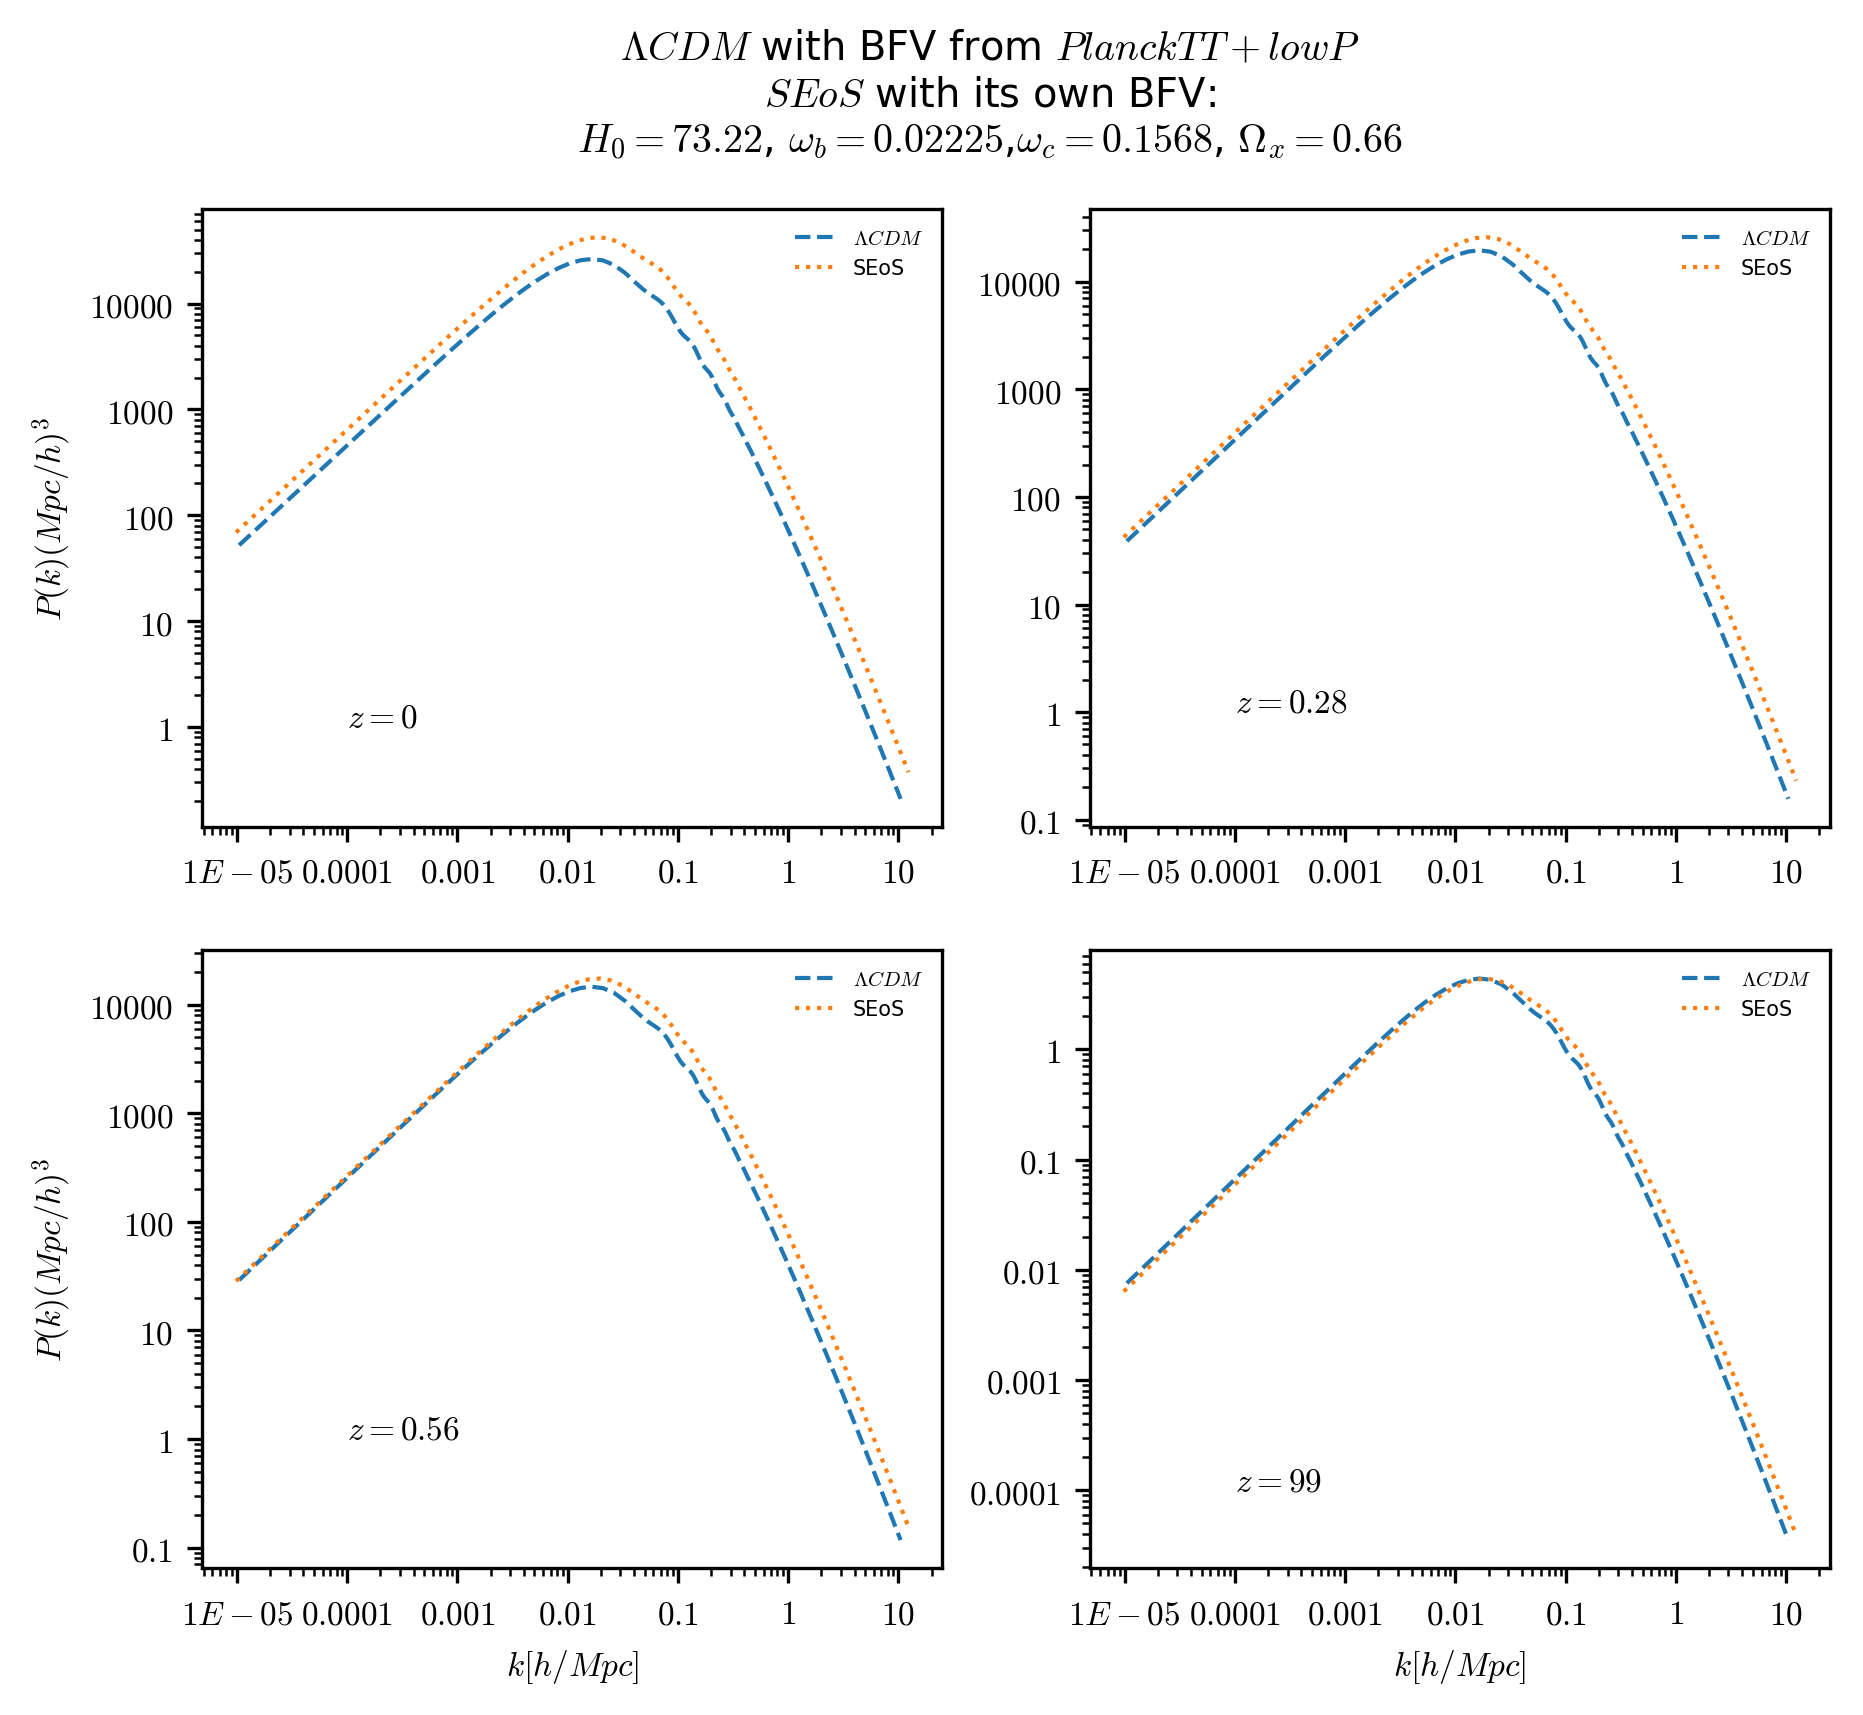

In [57]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

fig.suptitle(r"$\Lambda CDM$ with BFV from $Planck TT+lowP$" 
           "\n"  # Newline
            r'$SEoS$ with its own BFV:'         
           "\n"  # Newline
           r"$H_0 = 73.22$, $\omega_b=0.02225$,$\omega_c=0.1568$, $\Omega_x=0.66$")

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)

ax1.text(1e-4,1,r'$z=0$')

ax1.plot(pk_l_p_z0[:,0], pk_l_p_z0[:,1], label=label_l,ls=ls_l)
ax1.plot(pk_s_s_z0[:,0], pk_s_s_z0[:,1], label=label_s,ls=ls_s)
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylabel(r'$P(k)(Mpc/h)^3$')
#ax1.set_xlabel(r'$k[h/Mpc]$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.text(1e-4,1,r'$z=0.28$')
ax2.plot(pk_l_p_z028[:,0], pk_l_p_z028[:,1], label=label_l,ls=ls_l)
ax2.plot(pk_s_s_z028[:,0], pk_s_s_z028[:,1], label=label_s,ls=ls_s)
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
ax2.set_yscale('log')
#ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.text(1e-4,1,r'$z=0.56$')
ax3.plot(pk_l_p_z056[:,0], pk_l_p_z056[:,1], label=label_l,ls=ls_l)
ax3.plot(pk_s_s_z056[:,0], pk_s_s_z056[:,1], label=label_s,ls=ls_s)
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_ylabel(r'$P(k)(Mpc/h)^3$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.text(1e-4,1e-4,r'$z=99$')
ax4.plot(pk_l_p_z99[:,0], pk_l_p_z99[:,1], label=label_l,ls=ls_l)
ax4.plot(pk_s_s_z99[:,0], pk_s_s_z99[:,1], label=label_s,ls=ls_s)
ax4.legend(loc='best', frameon=False, prop={'size':5})
ax4.set_xscale('log')
ax4.set_yscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_bfvplanck-vs-seos.pdf', bbox_inches ='tight')

## Interpolating the arrays to make ratios

First we need to know the range of the k-values for each P(k). Then we can use interp1d from scipy to interpolate the arrays and create new ones than can be manipulated.

In [46]:
amin(pk_l_p_z0), amin(pk_l_s_z0), amin(pk_s_s_z0), amin(pk_s_p_z0)
#amax(pk_l_p_z0[:,0]), amax(pk_l_p_z028[:,0]), amax(pk_l_p_z1[:,0]), amax(pk_l_p_z99[:,0])
amax(pk_l_p_z0[:,0]), amax(pk_l_s_z0[:,0]), amax(pk_s_s_z0[:,0]), amax(pk_s_p_z0[:,0])


(10.47741895618, 10.73195994162, 12.35443214603, 11.97938874945)

In [13]:
karray = np.logspace(-4, 1, 50)
karray.shape

#instead of creating a new array of k's we will use the ones from class
k_a, k_b, k_c, k_d = pk_s_s_z0[:,0], pk_s_p_z0[:,0], pk_l_s_z0[:,0], pk_l_p_z0[:,0]

#k_array = np.array()
#append(k_array, k_a)

In [60]:
#---------------------------------------- SEoS ----------------------------------------#

# SEOS - seos
pkssz0_func = interpolate.interp1d(pk_s_s_z0[:,0], pk_s_s_z0[:,1])
pkssz028_func = interpolate.interp1d(pk_s_s_z028[:,0], pk_s_s_z028[:,1])
pkssz056_func = interpolate.interp1d(pk_s_s_z056[:,0], pk_s_s_z056[:,1])
pkssz1_func = interpolate.interp1d(pk_s_s_z1[:,0], pk_s_s_z1[:,1])
pkssz99_func = interpolate.interp1d(pk_s_s_z99[:,0], pk_s_s_z99[:,1])

pkssz0_int = pkssz0_func(karray)
pkssz028_int = pkssz028_func(karray)
pkssz056_int = pkssz056_func(karray)
pkssz1_int = pkssz1_func(karray)
pkssz99_int = pkssz99_func(karray)


# SEOS -SEOS  w_i= -0.99999

pkssz0_func99 = interpolate.interp1d(pk_s_s99_z0[:,0], pk_s_s99_z0[:,1])
pkssz028_func99 = interpolate.interp1d(pk_s_s99_z028[:,0], pk_s_s99_z028[:,1])
pkssz056_func99 = interpolate.interp1d(pk_s_s99_z056[:,0], pk_s_s99_z056[:,1])
pkssz1_func99 = interpolate.interp1d(pk_s_s99_z1[:,0], pk_s_s99_z1[:,1])
pkssz99_func99 = interpolate.interp1d(pk_s_s99_z99[:,0], pk_s_s99_z99[:,1])

pkssz0_int99 = pkssz0_func99(karray)
pkssz028_int99 = pkssz028_func99(karray)
pkssz056_int99 = pkssz056_func99(karray)
pkssz1_int99 = pkssz1_func99(karray)
pkssz99_int99 = pkssz99_func99(karray)

# SEOS - planck
pkspz0_func  = interpolate.interp1d(pk_s_p_z0[:,0], pk_s_p_z0[:,1])
pkspz028_func  = interpolate.interp1d(pk_s_p_z028[:,0], pk_s_p_z028[:,1])
pkspz056_func  = interpolate.interp1d(pk_s_p_z056[:,0], pk_s_p_z056[:,1])
pkspz1_func  = interpolate.interp1d(pk_s_p_z1[:,0], pk_s_p_z1[:,1])
pkspz99_func  = interpolate.interp1d(pk_s_p_z99[:,0], pk_s_p_z99[:,1])

pkspz0_int = pkspz0_func(karray)
pkspz028_int = pkspz028_func(karray)
pkspz056_int = pkspz056_func(karray)
pkspz1_int = pkspz1_func(karray)
pkspz99_int = pkspz99_func(karray)



# SEOS - planck w_i= -0.99999
pkspz0_func99  = interpolate.interp1d(pk_s_p99_z0[:,0], pk_s_p99_z0[:,1])
pkspz028_func99  = interpolate.interp1d(pk_s_p99_z028[:,0], pk_s_p99_z028[:,1])
pkspz056_func99  = interpolate.interp1d(pk_s_p99_z056[:,0], pk_s_p99_z056[:,1])
pkspz1_func99  = interpolate.interp1d(pk_s_p99_z1[:,0], pk_s_p99_z1[:,1])
pkspz99_func99  = interpolate.interp1d(pk_s_p99_z99[:,0], pk_s_p99_z99[:,1])

pkspz0_int99 = pkspz0_func99(karray)
pkspz028_int99 = pkspz028_func99(karray)
pkspz056_int99 = pkspz056_func99(karray)
pkspz1_int99 = pkspz1_func99(karray)
pkspz99_int99 = pkspz99_func99(karray)

#---------------------------------------- LCDM ----------------------------------------#

# LCDM - seos
pklsz0_func = interpolate.interp1d(pk_l_s_z0[:,0], pk_l_s_z0[:,1])
pklsz028_func = interpolate.interp1d(pk_l_s_z028[:,0], pk_l_s_z028[:,1])
pklsz056_func = interpolate.interp1d(pk_l_s_z056[:,0], pk_l_s_z056[:,1])
pklsz1_func = interpolate.interp1d(pk_l_s_z1[:,0], pk_l_s_z1[:,1])
pklsz99_func = interpolate.interp1d(pk_l_s_z99[:,0], pk_l_s_z99[:,1])

pklsz0_int = pklsz0_func(karray)
pklsz028_int = pklsz028_func(karray)
pklsz056_int = pklsz056_func(karray)
pklsz1_int = pklsz1_func(karray)
pklsz99_int = pklsz99_func(karray)


# LCDM - planck
pklpz0_func  = interpolate.interp1d(pk_l_p_z0[:,0], pk_l_p_z0[:,1])
pklpz028_func  = interpolate.interp1d(pk_l_p_z028[:,0], pk_l_p_z028[:,1])
pklpz056_func  = interpolate.interp1d(pk_l_p_z056[:,0], pk_l_p_z056[:,1])
pklpz1_func  = interpolate.interp1d(pk_l_p_z1[:,0], pk_l_p_z1[:,1])
pklpz99_func  = interpolate.interp1d(pk_l_p_z99[:,0], pk_l_p_z99[:,1])

pklpz0_int = pklpz0_func(karray)
pklpz028_int = pklpz028_func(karray)
pklpz056_int = pklpz056_func(karray)
pklpz1_int = pklpz1_func(karray)
pklpz99_int = pklpz99_func(karray)


Let's look at the ratios

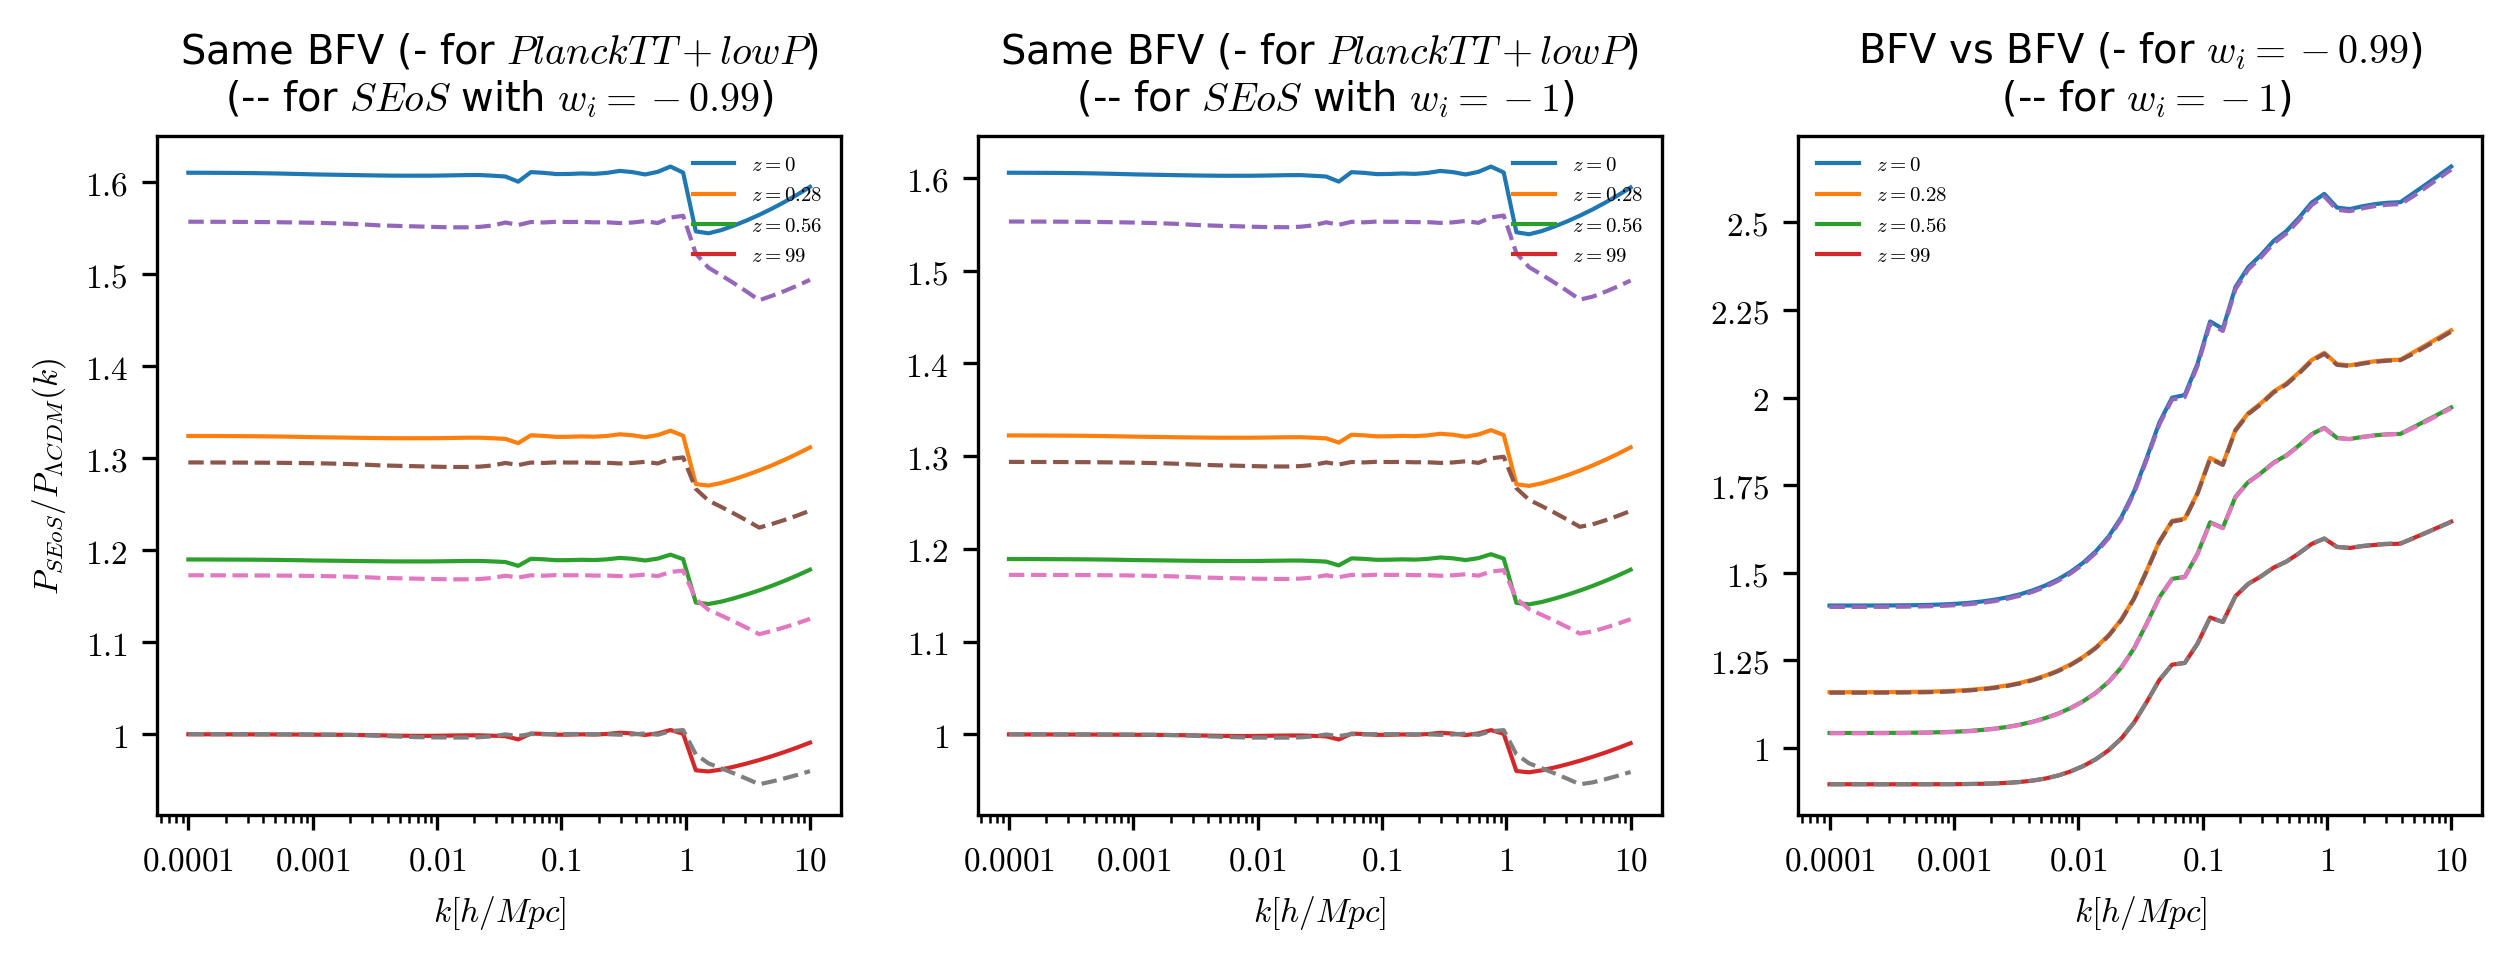

In [71]:
fig = plt.figure(figsize=(10,3), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

#fig.suptitle(r"$\Lambda CDM$ with BFV from $Planck TT+lowP$" 
#           "\n"  # Newline
#            r'$SEoS$ with its own BFV:'         
#           "\n"  # Newline
#           r"$H_0 = 73.22$, $\omega_b=0.02225$,$\omega_c=0.1568$, $\Omega_x=0.66$")

ax1=fig.add_subplot(131)
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
#ax4=fig.add_subplot(224)

ax1.set_title(r'Same BFV (- for $Planck TT+lowP$)'
              "\n"  # Newline
              r'(-- for $SEoS$ with $w_i=-0.99$)')
ax1.plot(karray, pkspz0_int/pklpz0_int, label =r'$z=0$')
ax1.plot(karray, pkspz028_int/pklpz028_int, label =r'$z=0.28$')
ax1.plot(karray, pkspz056_int/pklpz056_int, label =r'$z=0.56$')
ax1.plot(karray, pkspz99_int/pklpz99_int, label =r'$z=99$')
#
ax1.plot(karray, pkssz0_int/pklsz0_int, #label =r'$z=0$', 
         ls='--')
ax1.plot(karray, pkssz028_int/pklsz028_int, #label =r'$z=0.28$', 
         ls='--')
ax1.plot(karray, pkssz056_int/pklsz056_int, #label =r'$z=0.56$', 
         ls='--')
ax1.plot(karray, pkssz99_int/pklsz99_int, #label =r'$z=99$', 
         ls='--')
ax1.legend(loc='best', frameon=False, prop={'size':5})
ax1.set_xscale('log')
ax1.set_ylabel(r'$P_{SEoS}/P_{\Lambda CDM}(k)$')
ax1.set_xlabel(r'$k[h/Mpc]$')
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.set_title(r'Same BFV (- for $Planck TT+lowP$)'
               "\n"  # Newline
              ' (-- for $SEoS$ with $w_i=-1$)')
ax2.plot(karray, pkspz0_int99/pklpz0_int, label =r'$z=0$')
ax2.plot(karray, pkspz028_int99/pklpz028_int, label =r'$z=0.28$')
ax2.plot(karray, pkspz056_int99/pklpz056_int, label =r'$z=0.56$')
ax2.plot(karray, pkspz99_int99/pklpz99_int, label =r'$z=99$')
#
ax2.plot(karray, pkssz0_int99/pklsz0_int,# label =r'$z=0$',
         ls='--')
ax2.plot(karray, pkssz028_int99/pklsz028_int, #label =r'$z=0.28$',
         ls='--')
ax2.plot(karray, pkssz056_int99/pklsz056_int, #label =r'$z=0.56$', 
         ls='--')
ax2.plot(karray, pkssz99_int99/pklsz99_int, #label =r'$z=99$', 
         ls='--')
ax2.legend(loc='best', frameon=False, prop={'size':5})
ax2.set_xscale('log')
#ax2.set_ylabel(r'$P_{SEoS}/P_{\Lambda CDM}(k)$')
ax2.set_xlabel(r'$k[h/Mpc]$')
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())



ax3.set_title(r'BFV vs BFV (- for $w_i=-0.99$)'
               "\n"  # Newline
              ' (-- for $w_i=-1$)')
ax3.plot(karray, pkssz0_int/pklpz0_int, label =r'$z=0$')
ax3.plot(karray, pkssz028_int/pklpz028_int, label =r'$z=0.28$')
ax3.plot(karray, pkssz056_int/pklpz056_int, label =r'$z=0.56$')
ax3.plot(karray, pkssz99_int/pklpz99_int, label =r'$z=99$')
#
ax3.plot(karray, pkssz0_int99/pklpz0_int, #label =r'$z=0$', 
         ls='--')
ax3.plot(karray, pkssz028_int99/pklpz028_int,# label =r'$z=0.28$', 
         ls='--')
ax3.plot(karray, pkssz056_int99/pklpz056_int, #label =r'$z=0.56$', 
         ls='--')
ax3.plot(karray, pkssz99_int99/pklpz99_int, #label =r'$z=99$', 
         ls='--')
ax3.legend(loc='best', frameon=False, prop={'size':5})
ax3.set_xscale('log')
#ax3.set_ylabel(r'$P_{SEoS}/P_{\Lambda CDM}(k)$')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())


#plt.savefig(figspath+'pk_bfvplanck-vs-seos.pdf', bbox_inches ='tight')

(0.001, 10)

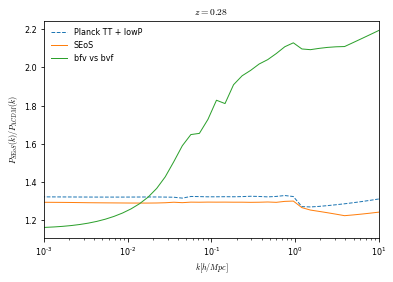

In [56]:
plot(karray, pkspz028_int/pklpz028_int, label =r'Planck TT + lowP', ls='--')
plot(karray, pkssz028_int/pklsz028_int,label =r'SEoS')
plot(karray, pkssz028_int/pklpz028_int,label =r'bfv vs bvf')

title(r'$z=0.28$')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,10)

#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

(0.001, 10)

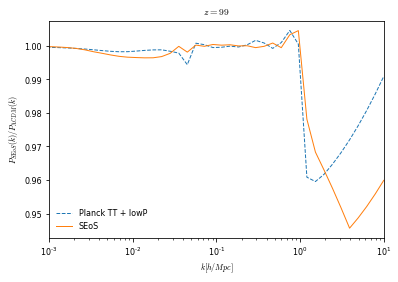

In [17]:
plot(karray, pkspz99_int/pklpz99_int, label =r'Planck TT + lowP', ls='--')
plot(karray, pkssz99_int/pklsz99_int,label =r'SEoS')
title(r'$z=99$')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,10)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

(0.001, 2)

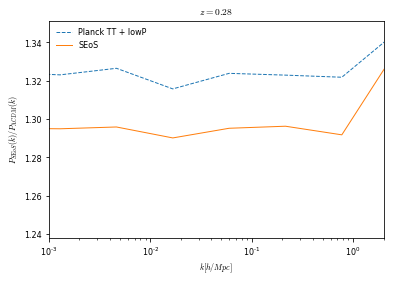

In [12]:
plot(karray, pkspz028_int/pklpz028_int, label =r'Planck TT + lowP', ls='--')
plot(karray, pkssz028_int/pklsz028_int,label =r'SEoS')
title(r'$z=0.28$')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,2)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

(0.001, 10)

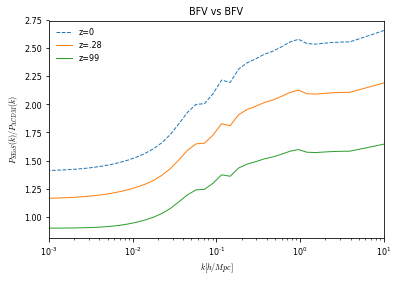

In [72]:
plot(karray, pkssz0_int/pklpz0_int, label =r'z=0', ls='--')
plot(karray, pkssz028_int/pklpz028_int,label =r'z=.28')
plot(karray, pkssz99_int/pklpz99_int,label =r'z=99')

title(r'BFV vs BFV')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,10)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

(0.001, 10)

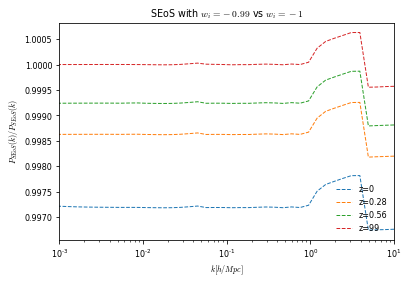

In [73]:
plot(karray, pkssz0_int99/pkssz0_int, label =r'z=0', ls='--')
plot(karray, pkssz028_int99/pkssz028_int, label =r'z=0.28', ls='--')
plot(karray, pkssz056_int99/pkssz056_int, label =r'z=0.56', ls='--')
plot(karray, pkssz99_int99/pkssz99_int, label =r'z=99', ls='--')


#plot(karray, pkssz0_int/pklsz028_int,label =r'SEoS')
title(r'SEoS with $w_i = -0.99$ vs $w_i=-1$')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{SEoS}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,10)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

(0.001, 10)

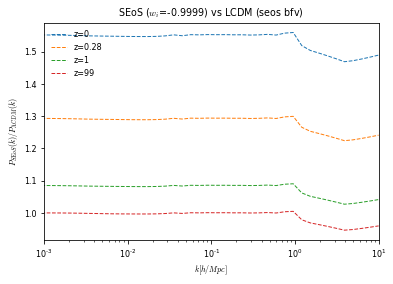

In [41]:
plot(karray, pkssz0_int99/pklsz0_int, label =r'z=0', ls='--')
plot(karray, pkssz028_int99/pklsz028_int, label =r'z=0.28', ls='--')
plot(karray, pkssz1_int99/pklsz1_int, label =r'z=1', ls='--')
plot(karray, pkssz99_int99/pklsz99_int, label =r'z=99', ls='--')


#plot(karray, pkssz0_int/pklsz028_int,label =r'SEoS')
title(r'SEoS ($w_i$=-0.9999) vs LCDM (seos bfv)')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,10)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

(0.001, 10)

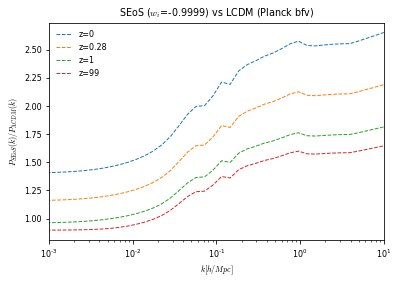

In [34]:
plot(karray, pkssz0_int99/pklpz0_int, label =r'z=0', ls='--')
plot(karray, pkssz028_int99/pklpz028_int, label =r'z=0.28', ls='--')
plot(karray, pkssz1_int99/pklpz1_int, label =r'z=1', ls='--')
plot(karray, pkssz99_int99/pklpz99_int, label =r'z=99', ls='--')


#plot(karray, pkssz0_int/pklsz028_int,label =r'SEoS')
title(r'SEoS ($w_i$=-0.9999) vs LCDM (Planck bfv)')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4,10)
#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

In [ ]:
fig = plt.figure(figsize=(7,6), dpi=300)
rcParams['font.size'] = 8
rcParams['lines.linewidth'] = 1
rcParams['mathtext.fontset'] = 'cm'

#fig.suptitle(r'BFV from Planck TT+lowP', fontsize=10)

ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)


ax1.plot(karray, pkspTTz0_int/pklpTTz0_int, label =r'Planck TT + lowP', ls='--')
ax1.plot(karray, pkspTEz0_int/pklpTEz0_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax1.plot(karray, pkssz0_int/pklsz0_int,label =r'SEoS')
ax1.text(10e-4,1, r'$z=0$')
ax1.set_xscale('log')
ax1.set_ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
ax1.legend(loc='best', frameon=False,prop={'size':5})
ax1.xaxis.set_major_formatter(FancyFormatter())
ax1.yaxis.set_major_formatter(FancyFormatter())

ax2.plot(karray, pkspTTz028_int/pklpTTz028_int, label =r'Planck TT + lowP', ls='--')
ax2.plot(karray, pkspTEz028_int/pklpTEz028_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax2.plot(karray, pkssz028_int/pklsz028_int,label =r'SEoS')
ax2.text(10e-4,1, r'$z=0.28$')
ax2.set_xscale('log')
ax2.legend(loc='best', frameon=False,prop={'size':5})
ax2.xaxis.set_major_formatter(FancyFormatter())
ax2.yaxis.set_major_formatter(FancyFormatter())

ax3.plot(karray, pkspTTz1_int/pklpTTz1_int, label =r'Planck TT + lowP', ls='--')
ax3.plot(karray, pkspTEz1_int/pklpTEz1_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax3.plot(karray, pkssz1_int/pklsz1_int,label =r'SEoS')
ax3.text(10e-4,1, r'$z=1$')
ax3.set_xscale('log')
ax3.set_xlabel(r'$k[h/Mpc]$')
ax3.set_ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
ax3.legend(loc='best', frameon=False,prop={'size':5})
ax3.xaxis.set_major_formatter(FancyFormatter())
ax3.yaxis.set_major_formatter(FancyFormatter())

ax4.plot(karray, pkspTTz99_int/pklpTTz99_int, label =r'Planck TT + lowP', ls='--')
ax4.plot(karray, pkspTEz99_int/pklpTEz99_int, label =r'Planck TT + TE+ EE lowP', ls=':')
ax4.plot(karray, pkssz99_int/pklsz99_int,label =r'SEoS')
ax4.text(10e-4,1, r'$z=99$')
ax4.set_xscale('log')
ax4.set_xlabel(r'$k[h/Mpc]$')
ax4.legend(loc='best', frameon=False,prop={'size':5})
ax4.xaxis.set_major_formatter(FancyFormatter())
ax4.yaxis.set_major_formatter(FancyFormatter())

#plt.savefig(figspath+'pk_ratios.pdf', bbox_inches ='tight')

(0.001, 10)

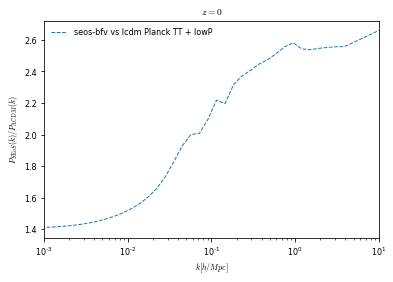

In [20]:
plot(karray, pkssz0_int/pklpz0_int, label =r'seos-bfv vs lcdm Planck TT + lowP', ls='--')
#plot(karray, pkssz028_int/pklsz028_int,label =r'SEoS')
title(r'$z=0$')
xscale('log')
xlabel(r'$k[h/Mpc]$')
ylabel(r'$P_{SEoS}(k)/P_{\Lambda CDM}(k)$')
legend(loc='best', frameon=False)
xlim(10e-4, 10)

#xaxis.set_major_formatter(FancyFormatter())
#yaxis.set_major_formatter(FancyFormatter())

### Renaming the spectrum files

In [ ]:

p1 = pk_s_s_z0
p2 = pk_s_s_z028 
p3 = pk_s_s_z056 
p4 = pk_s_s_z1 
p5 = pk_s_s_z99 

p6 = pk_s_pTT_z0 
p7 = pk_s_pTT_z028 
p8 = pk_s_pTT_z056 
p9 = pk_s_pTT_z1 
p10 =pk_s_pTT_z99

p11 = pk_s_pTE_z0 
p12 = pk_s_pTE_z028 
p13 = pk_s_pTE_z056 
p14 = pk_s_pTE_z1 
p15 = pk_s_pTE_z99


####


p1a = pk_l_s_z0
p2a = pk_l_s_z028 
p3a = pk_l_s_z056 
p4a = pk_l_s_z1 
p5a = pk_l_s_z99 

p6a = pk_l_pTT_z0 
p7a = pk_l_pTT_z028 
p8a = pk_l_pTT_z056 
p9a = pk_l_pTT_z1 
p10a =pk_l_pTT_z99

p11a = pk_l_pTE_z0 
p12a = pk_l_pTE_z028 
p13a = pk_l_pTE_z056 
p14a = pk_l_pTE_z1 
p15a = pk_l_pTE_z99


### Loop over file names

In [ ]:
for i in arange(1,7):
    st = i
    
    seosseos = "bfv_z{0}_pk.dat".format(st)
    seosptt = "pTTlP_z{0}_pk.dat".format(st)
    seospte = "pTTTEEElP_z{0}_pk.dat".format(st)
    
    file_ss = seospath+seosseos
    file_sptt = seospath+seosptt
    file_spte = seospath+seospte
    
    pk_ss_i = np.loadtxt(file_ss)
    pk_sptt_i = np.loadtxt(file_sptt)
    pk_spte_i = np.loadtxt(file_spte)
    
    pk_ss = np.array([])
    pk_ss = append(pk_ss, pk_ss_i)
    pk_ss.shape

    
    #print pk_ss_i.shape
#print pk_ss.shape



for i in arange(1,7):
    st = i
    
    lseos = "-seosbfv_z{0}_pk.dat".format(st)
    lptt = "_pTTlP_z{0}_pk.dat".format(st)
    lpte = "-pTTTEEElP_z{0}_pk.dat".format(st)

    file_ls = lcdmpath+lseos
    file_lptt = lcdmpath+lptt
    file_lpte = lcdmpath+lpte
    
    pk_ls = np.loadtxt(file_ls)
    pk_lptt = np.loadtxt(file_lptt)
    pk_lpte = np.loadtxt(file_lpte)
    
    sh4 = pk_ls.shape
    sh5 = pk_lptt.shape
    sh6 = pk_lpte.shape
    
    #print sh4, sh5, sh6 

pk_ls.shape